<a href="https://colab.research.google.com/github/saurab1994/Python_project/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**INTRODUCTION**
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/creditcard.csv')

In [ ]:
pd.set_option('display.max_columns',None)
print(f'shape of the data is :rows ={df.shape[0]},columns ={df.shape[1]}')
print('-'*200)
df.head()

shape of the data is :rows =284807,columns =31
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

NO Null value in dataset

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Data  is highly imbalance with only 492 fraud case out of 284807 transection entries

In [ ]:
grouped =df['Amount'].groupby(df['Class'])

In [ ]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


Fradulent transection have a larger mean and larger Q3 than valid transection. 

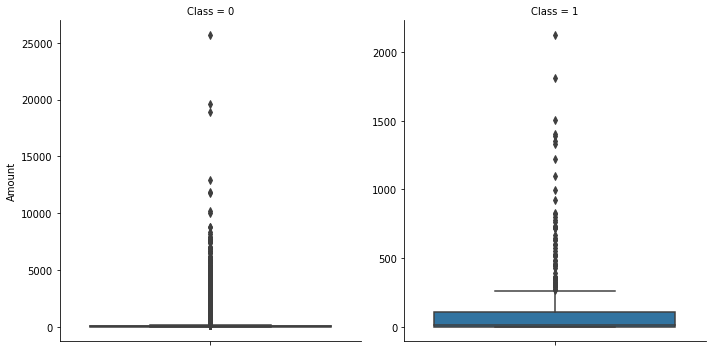

In [ ]:
# plotting a box plot for amount withdrawn column.Fraud transection are of less amount than non fraud.
import seaborn as sns
sns.catplot(data =df,y ='Amount',col ='Class',kind ='box',sharey=False)

Most of transection done of lower value same from boxplot. 

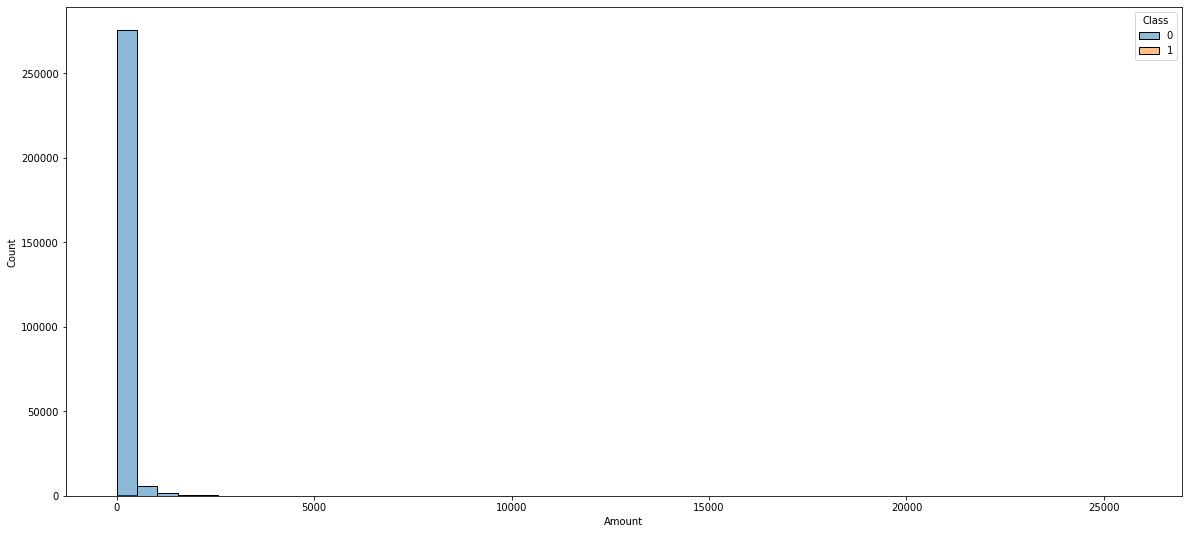

In [ ]:
# histogram plot for amount withdrawn column 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
sns.histplot(data =df,x ='Amount',hue ='Class',bins =50);

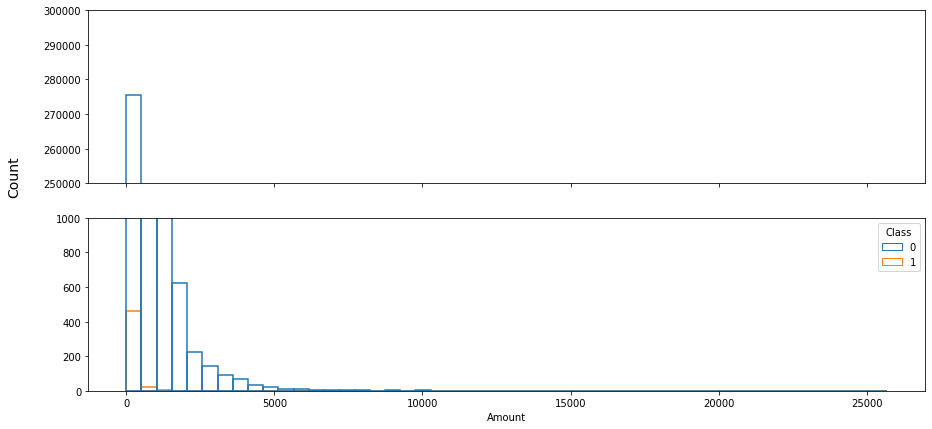

In [ ]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize =(15,7))
ax1 =sns.histplot(x =df['Amount'],hue =df['Class'],bins =50,ax=ax1,fill=False)
ax2= sns.histplot(x =df['Amount'],hue =df['Class'],bins =50,ax=ax2,fill =False)
ax1.set_ylim(250000, 300000)
ax2.set_ylim(0, 1000)
ax1.get_legend().remove()
ax1.set_ylabel("")
ax2.set_ylabel("")
fig.text(0.05, 0.55, "Count", va="center", rotation="vertical",fontsize =14)
plt.show()

Histogram plot shows some transection at value 0.
Segregating those data for further analysis in the following. 

In [ ]:
# segregating the data with 0 amount withdrawn
df1 =df[df['Amount']==0]

In [ ]:
df1['Class'].value_counts()

0    1798
1      27
Name: Class, dtype: int64

In [ ]:
columns_ =df.columns
labels_ =['NOT_FRAUD','FRAUD']

In [ ]:
columns_

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
columns_ =['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
print(len(columns_))


29


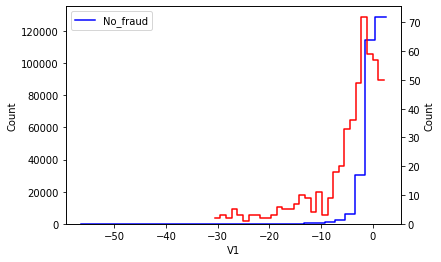

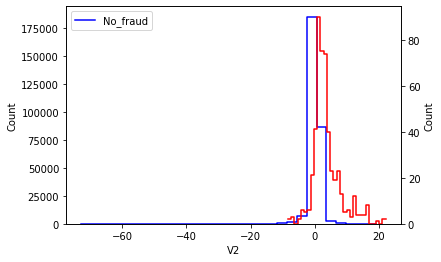

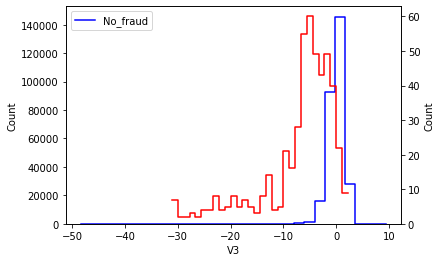

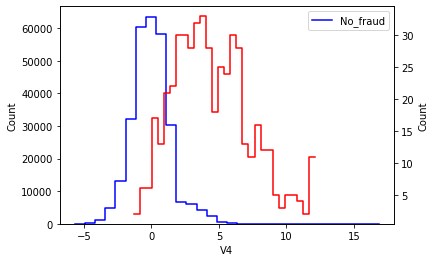

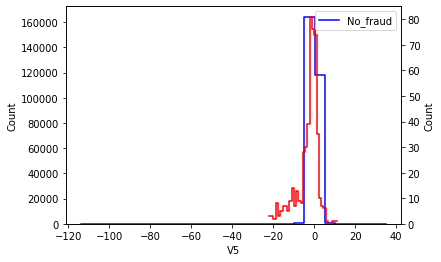

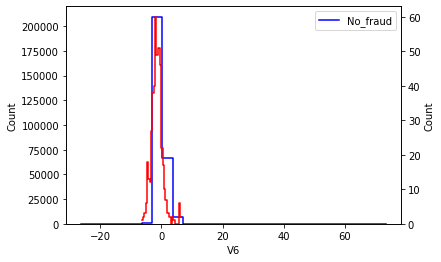

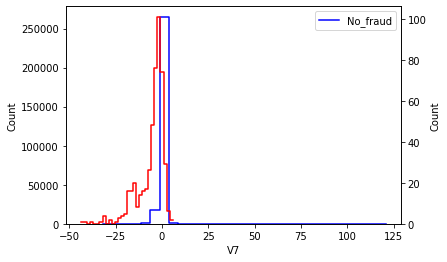

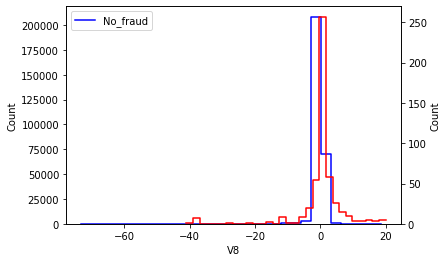

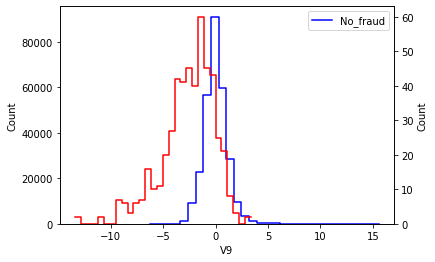

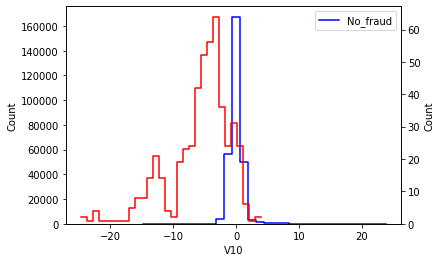

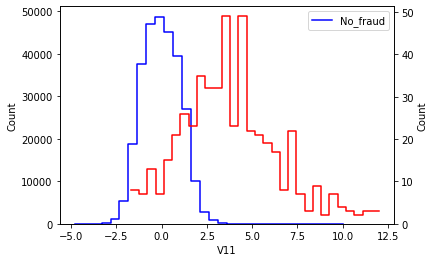

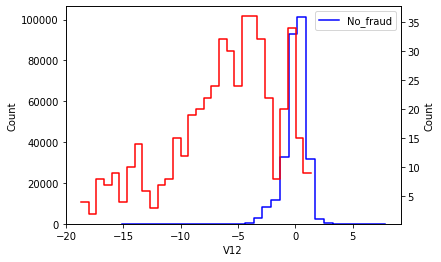

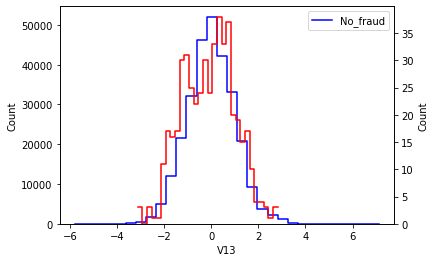

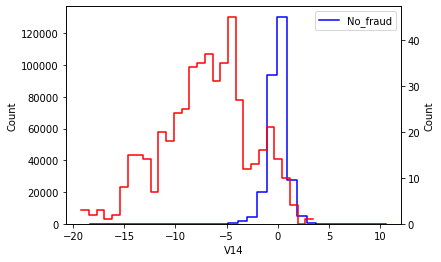

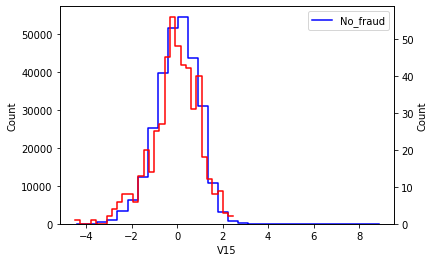

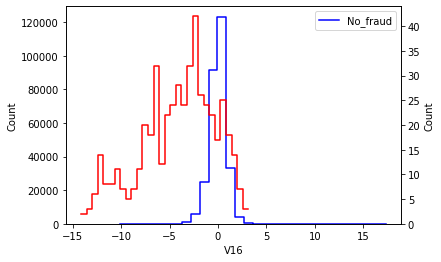

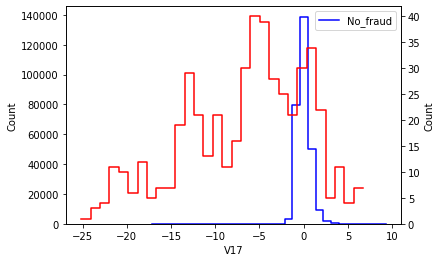

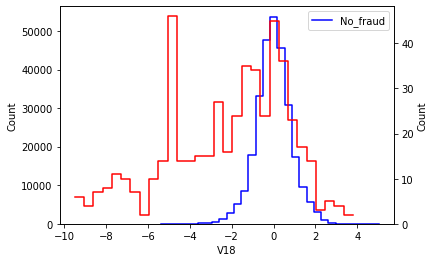

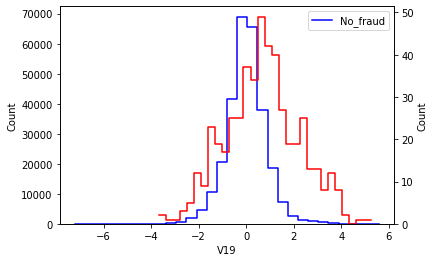

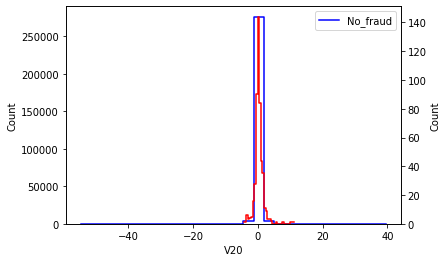

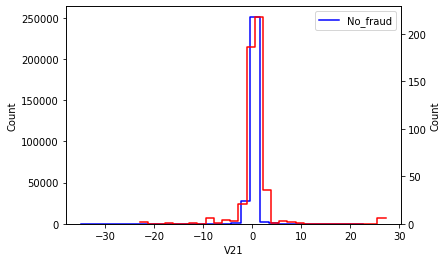

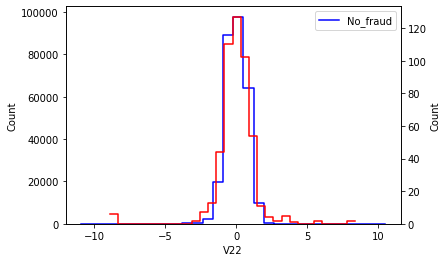

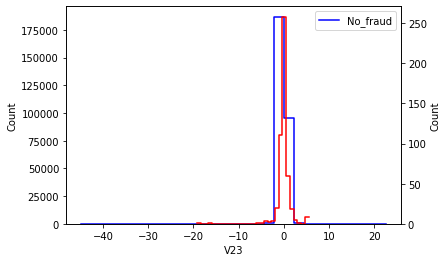

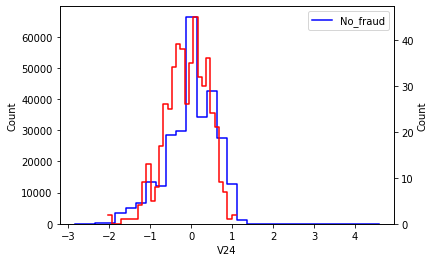

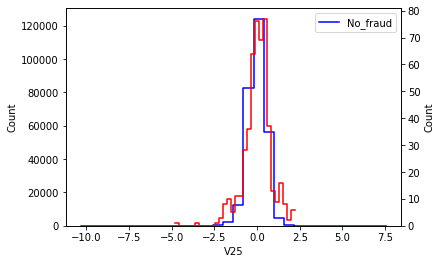

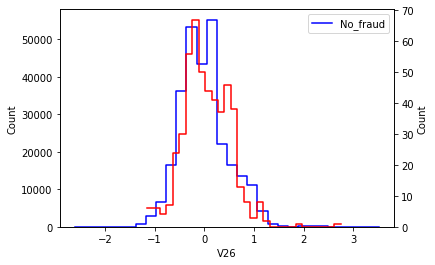

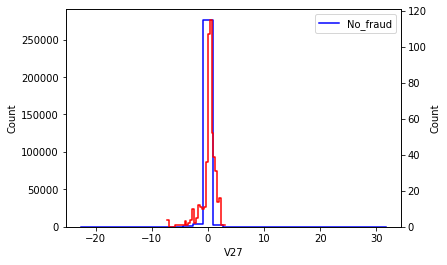

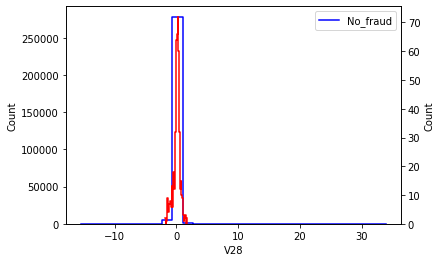

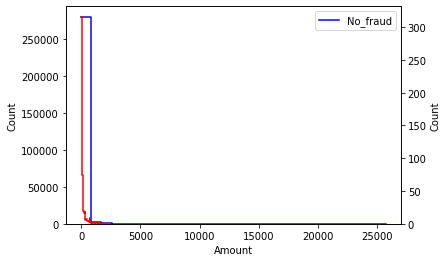

In [ ]:
for i in range(len(columns_)):
  fig, ax = plt.subplots()
  sns.histplot(data =df[df['Class']==0], bins=30, ax=ax,x=columns_[i],element ='step',color ='b',fill=False,label ='No_fraud')
  ax2 = ax.twinx()
  sns.histplot(data =df[df['Class']==1], bins=30, ax=ax2,x=columns_[i],element ='step',color ='r',fill =False,label ='Fraud')
  ax.legend()
  plt.show()

Fraudulent transactions have a distribution as of valid transactions for the  low real transaction 0.

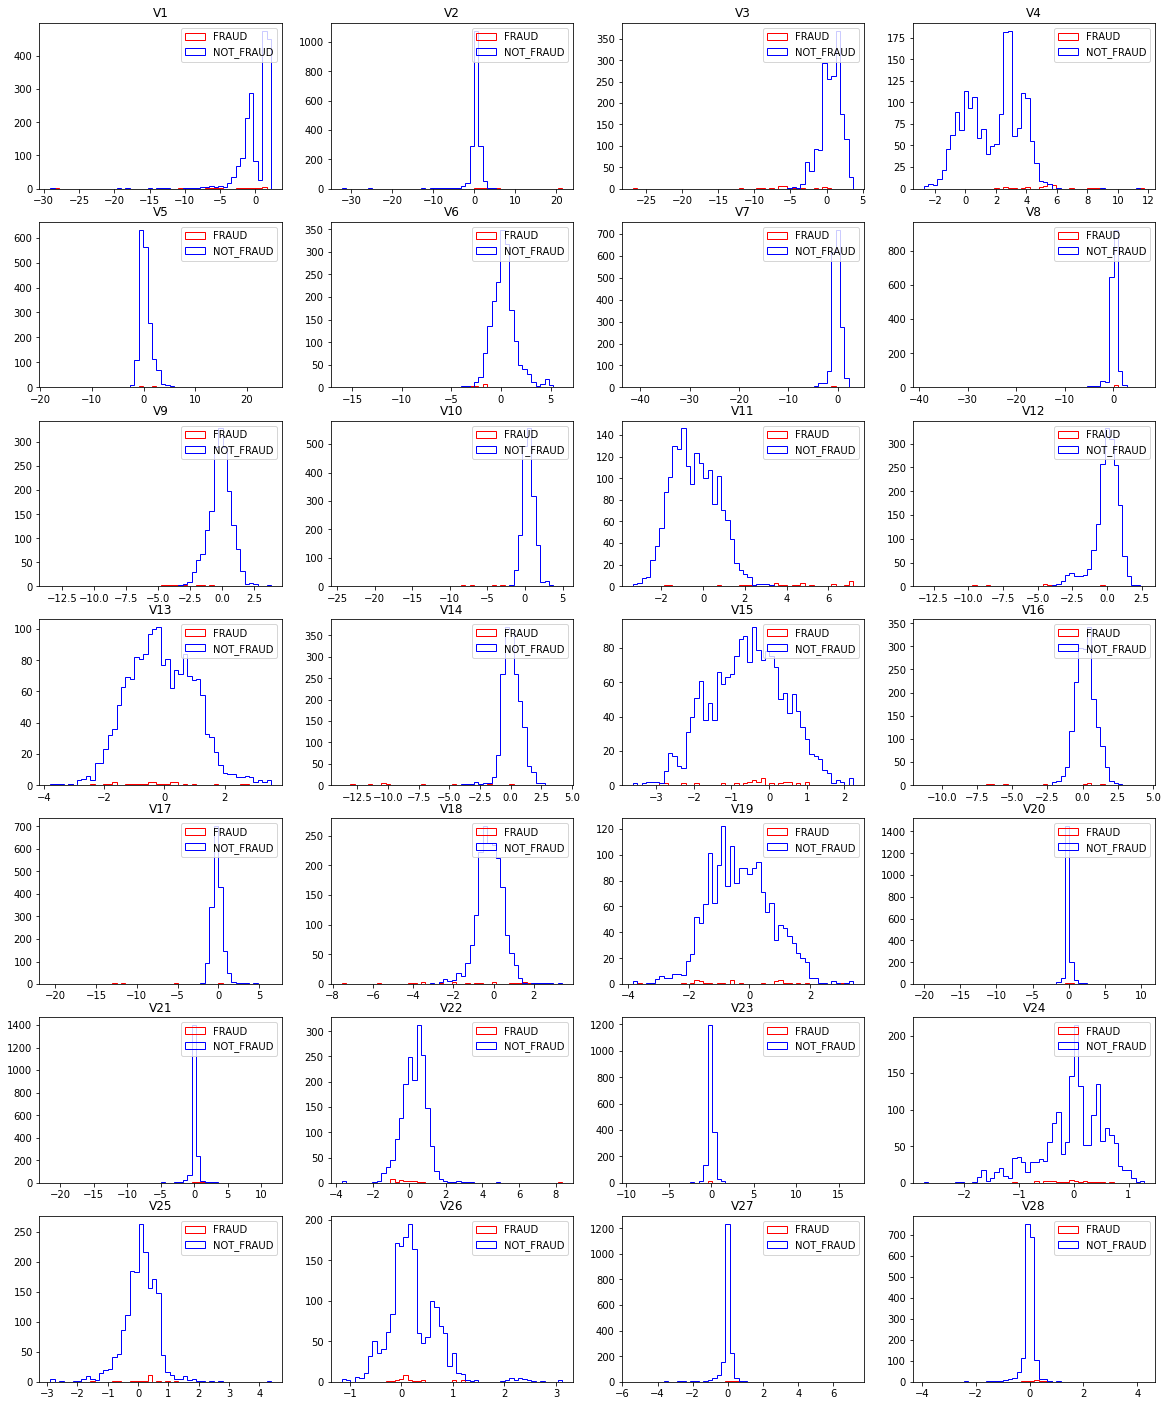

In [ ]:
p=0
fig,axes =plt.subplots(nrows =7,ncols =4,figsize =(20,25))
axes =axes.ravel()
for ax in axes:
  df2 =[df1.loc[df1['Class']==i,columns_[p]] for i in df1['Class'].unique()]
  ax.hist(x=df2,bins =50,histtype='step',color =['b','r'],label =labels_)
  ax.legend(loc ='best')
  ax.set_title(columns_[p])
  p+=1

In [ ]:
import numpy as np
df['hour'] =df['Time'].apply(lambda x: np.floor(x/3600))

In [ ]:
grouped =df.groupby(['Class','hour'])['Amount'].agg(['mean','max','min','sum','median','std']).reset_index()
grouped.head()

,Class,hour,mean,max,min,sum,median,std
0,0,0.0,64.774772,7712.43,0.0,256572.87,12.99,213.578607
1,0,1.0,65.826980,1769.69,0.0,145806.76,22.82,141.610790
2,0,2.0,68.803466,4002.88,0.0,106989.39,17.90,212.968144
3,0,3.0,52.039154,1903.26,0.0,94086.79,15.95,129.390056
4,0,4.0,73.466877,2126.13,0.0,79050.36,15.95,156.258963


In [ ]:
grouped.columns[1:]

Index(['hour', 'mean', 'max', 'min', 'sum', 'median', 'std'], dtype='object')

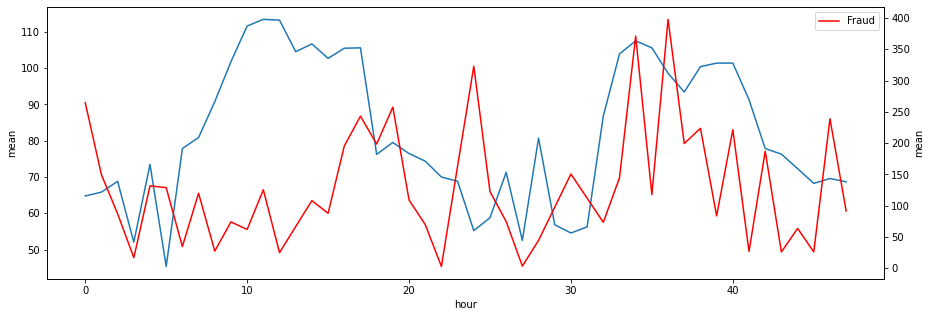

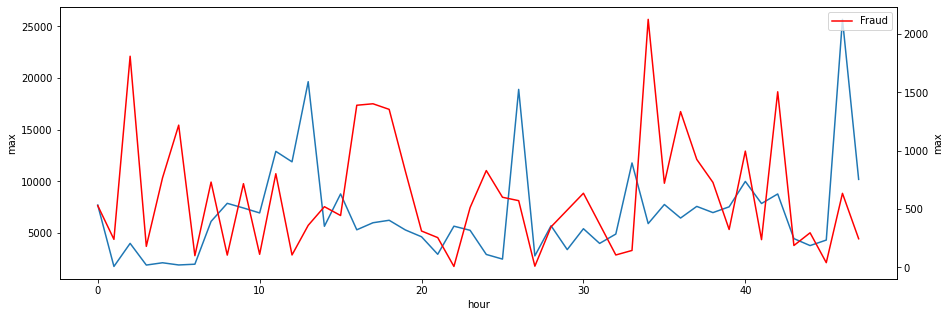

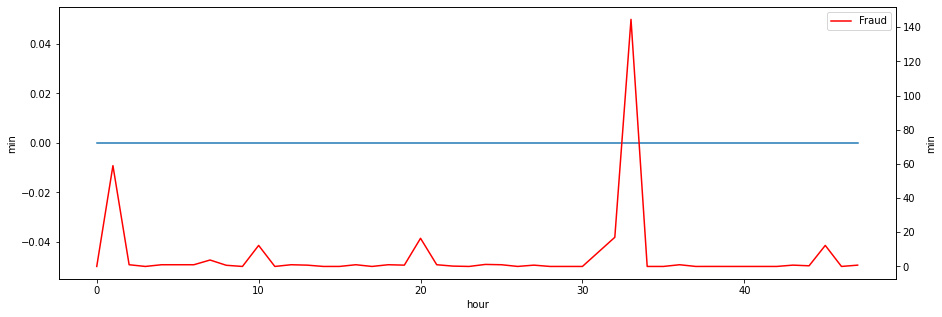

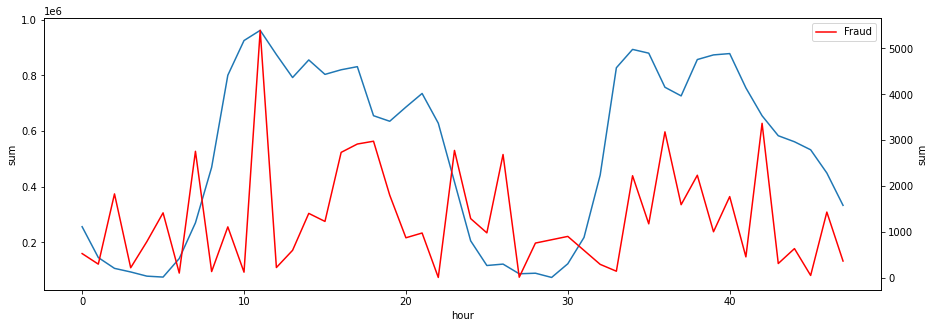

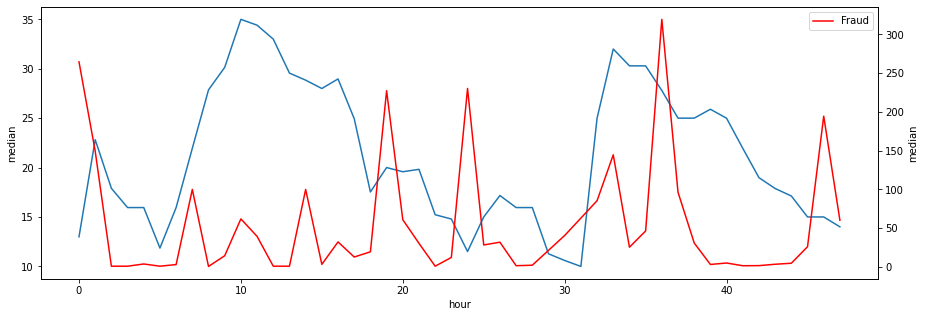

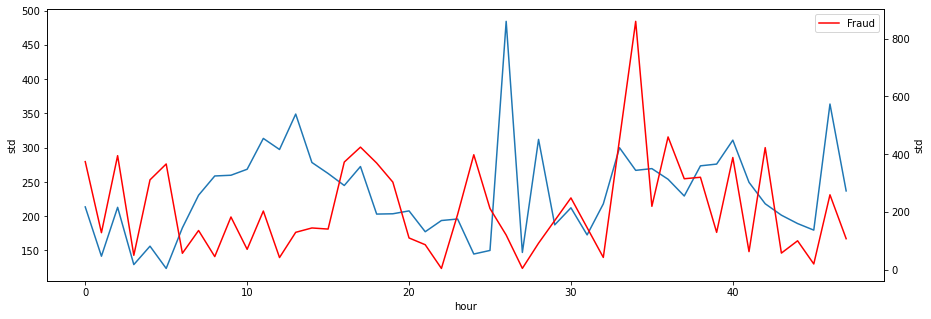

In [ ]:
for i in grouped.columns[2:]:
  fig, ax = plt.subplots(figsize =(15,5))
  sns.lineplot(data =grouped[grouped['Class']==0],  ax=ax,x='hour',y =i)
  ax2 = ax.twinx()
  sns.lineplot(data =grouped[grouped['Class']==1], ax=ax2,x='hour',y =i,label ='Fraud',color ='r') 
plt.show()

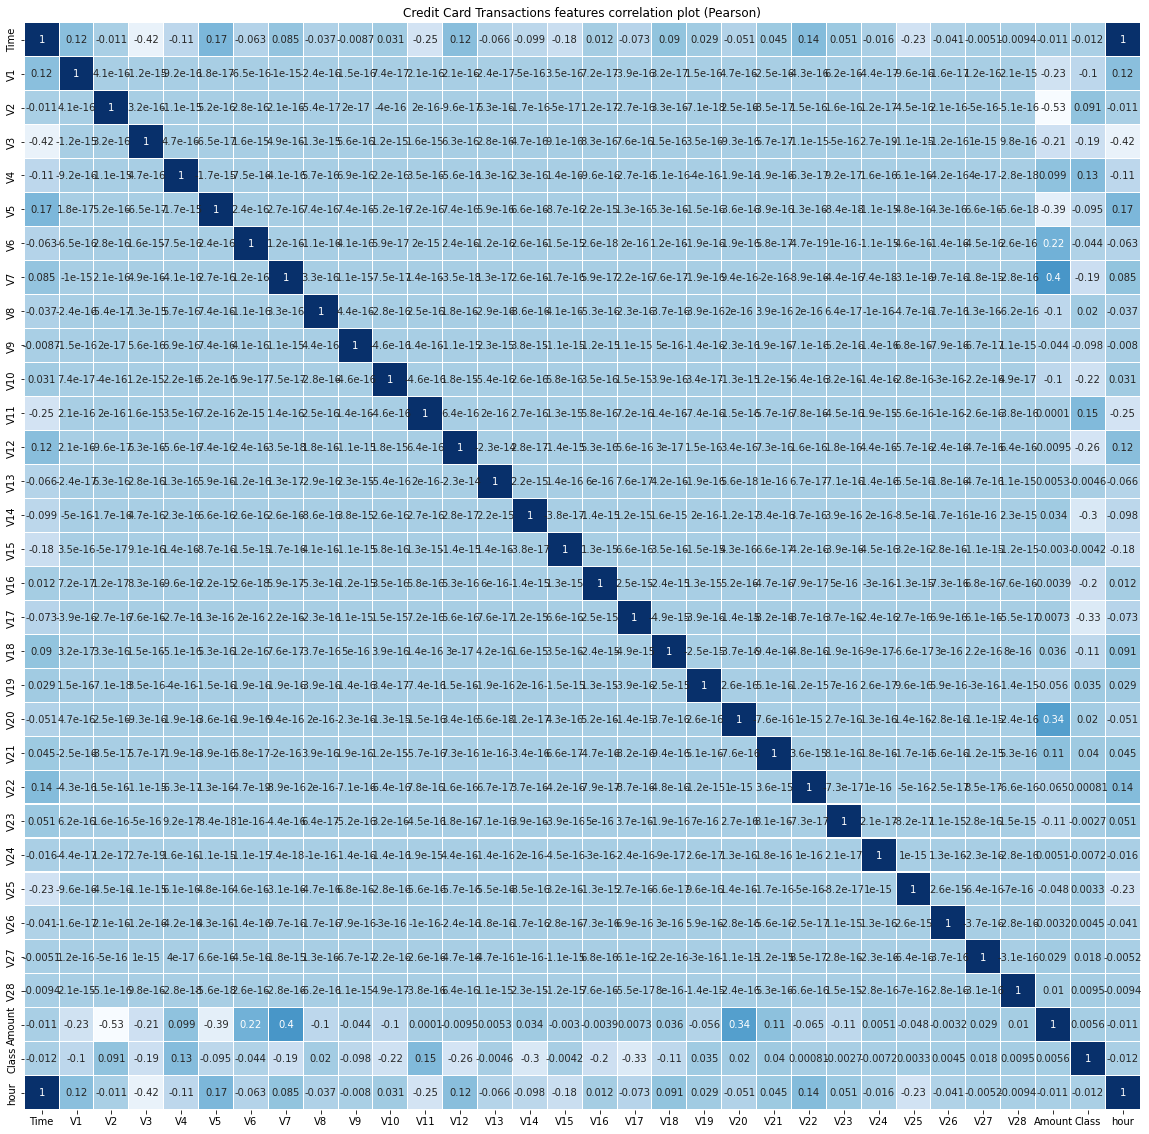

In [ ]:
plt.figure(figsize = (20,20))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
sns.heatmap(df.corr(),cmap ='Blues',linewidths=.1,cbar =False,annot =True);

NO notable linear correlation between features

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


Predictive model

In [ ]:
# defining the predictor feature and target feature
X =df.drop(['Class','hour'],axis =1)
y =df['Class']

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset into training and testing 
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=2,test_size=0.3,stratify =y)
print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of X_test: {y_test.shape}')

shape of X_train: (199364, 30)
shape of X_test: (85443, 30)
shape of y_train: (199364,)
shape of X_test: (85443,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf =SVC(probability=True)
clf.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
print(f'training accuracy for Supprt vector machine  is :{clf.score(X_train,y_train)}')
print('')
print(f'testing accuracy for Supprt vector machine  is :{clf.score(X_test,y_test)}')

training accuracy for Supprt vector machine  is :0.9982745129511847

testing accuracy for Supprt vector machine  is :0.9982678510820079


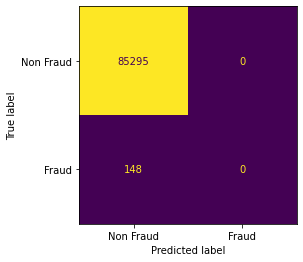

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,colorbar=False,display_labels=['Non Fraud','Fraud'])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print(classification_report(y_test,clf.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print(f'area under the roc curve for suport vector machine is :{roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])}')

area under the roc curve for suport vector machine is :0.6220766402136939


Support vector machine is a dumb model with 0 precision and 0 recall for fraud transection with auc_roc_score 0.622.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_random =RandomForestClassifier()
clf_random.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
tmp =pd.DataFrame({'feature':X_train.columns,'feature_importance':clf_random.feature_importances_})
tmp.sort_values(by='feature_importance',ascending =False,inplace =True)


<function matplotlib.pyplot.show>

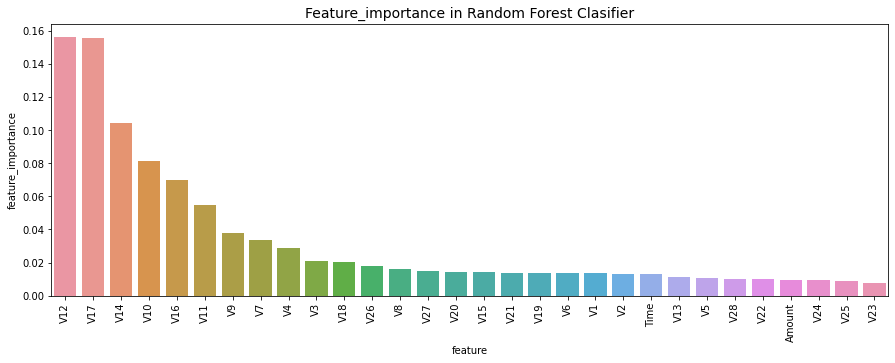

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Feature_importance in Random Forest Clasifier',fontsize =14)
s=sns.barplot(data =tmp,x='feature',y='feature_importance')
s.set_xticklabels(s.get_xticklabels(),rotation =90)
plt.show

most used feature by random forest classifier is V12 and V17

In [ ]:
print(f'training accuracy for   Random Forest Classifier  is :{clf_random.score(X_train,y_train)}')
print('')
print(f'testing accuracy for Random Forest Classifier  is :{clf_random.score(X_test,y_test)}')

training accuracy for   Random Forest Classifier  is :1.0

testing accuracy for Random Forest Classifier  is :0.9995552590615966


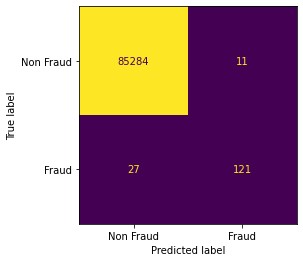

In [ ]:
plot_confusion_matrix(clf_random,X_test,y_test,colorbar=False,display_labels=['Non Fraud','Fraud'])

In [ ]:
print(classification_report(y_test,clf_random.predict(X_test)))
print('-'*100)
print(f'area under the roc curve for random forest classifier is :{roc_auc_score(y_test,clf_random.predict_proba(X_test)[:,1])}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.82      0.86       148

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

----------------------------------------------------------------------------------------------------
area under the roc curve for random forest classifier is :0.9580444577879949


Random forest classifier recall for fradulent transection is .82 with area under the roc curve 0.958

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gradient =GradientBoostingClassifier(learning_rate=0.05,max_depth=5,n_estimators=150)
clf_gradient.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=150)

<function matplotlib.pyplot.show>

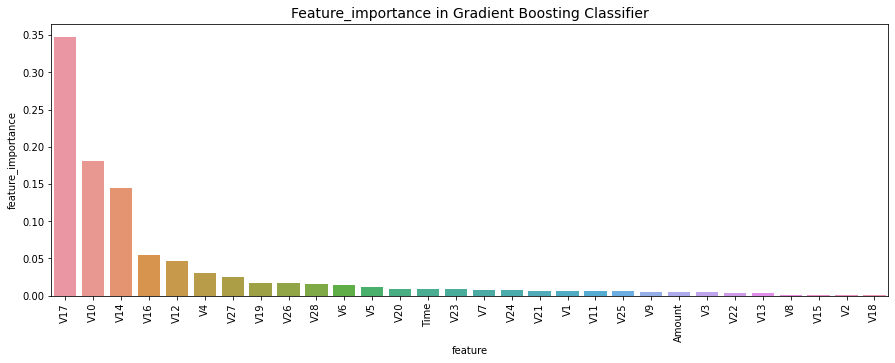

In [ ]:
tmp1 =pd.DataFrame({'feature':X_train.columns,'feature_importance':clf_gradient.feature_importances_})
tmp1.sort_values(by='feature_importance',ascending =False,inplace =True)
plt.figure(figsize=(15,5))
plt.title('Feature_importance in Gradient Boosting Classifier',fontsize =14)
s=sns.barplot(data =tmp1,x='feature',y='feature_importance')
s.set_xticklabels(s.get_xticklabels(),rotation =90)
plt.show

In [ ]:
print(f'training accuracy for   Gradient Boosting Classifier  is :{clf_gradient.score(X_train,y_train)}')
print('')
print(f'testing accuracy for Gradient Boosting Classifier  is :{clf_gradient.score(X_test,y_test)}')

training accuracy for   Gradient Boosting Classifier  is :0.9999799361971068

testing accuracy for Gradient Boosting Classifier  is :0.9991807403766253


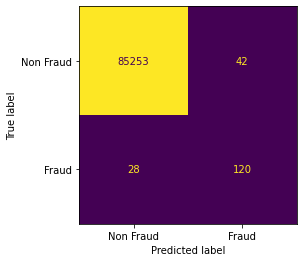

In [ ]:
plot_confusion_matrix(clf_gradient,X_test,y_test,colorbar=False,display_labels=['Non Fraud','Fraud'])

In [ ]:
print(classification_report(y_test,clf_gradient.predict(X_test)))
print('-'*100)
print(f'area under the roc curve for Gradient Boosting Classifier is :{roc_auc_score(y_test,clf_gradient.predict_proba(X_test)[:,1])}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.81      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443

----------------------------------------------------------------------------------------------------
area under the roc curve for Gradient Boosting Classifier is :0.9536887875624027
